# Fundamentals of visualisation libraries, part 1

## This script contains the following:

### 1. Import libraries and data

### 2. Create a line plot of 2018 temperatures

### 3. Create a column with the count of trips per day and merge it with the weather dataframe

### 4. Create a line chart of bike trip counts and tempertures plotted on a dual axis

### 1. Import libraries and data

In [1]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
# import data

df = pd.read_csv('Chicago_data.csv', index_col = 0)

In [3]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       '_merge'],
      dtype='object')

In [4]:
df.drop(columns = {'_merge'}, inplace = True)

In [5]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,date,avgTemp
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018-01-01,-18.9
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018-01-01,-18.9
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,2018-01-01,-18.9
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,2018-01-01,-18.9
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,2018-01-01,-18.9


In [6]:
df.shape

(3603082, 14)

In [7]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

trip_id                       int64
start_time                   object
end_time                     object
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
date                 datetime64[ns]
avgTemp                     float64
dtype: object

### 2. Create a line plot of 2022 temperatures

In [10]:
df_temp = df.set_index('date')

In [11]:
df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp
date,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,-18.9
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,-18.9
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,-18.9
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,-18.9
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,-18.9


<Axes: xlabel='date'>

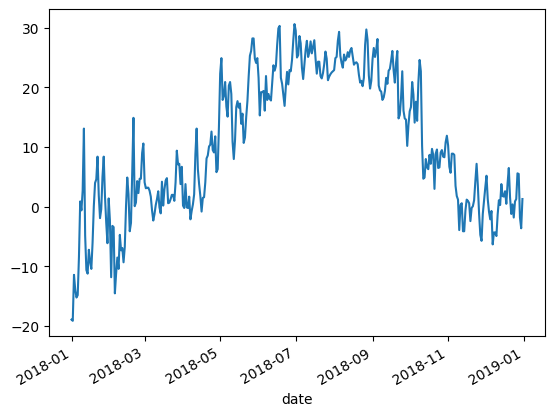

In [13]:
# create line plot using a pandas plotting function

df_temp['avgTemp'].plot()

### 3. Create a column with the count of trips per day and merge it with the weather dataframe

In [14]:
# groupby the count of bike rides

df_group = pd.DataFrame(df.groupby(['date'])['trip_id'].count()).reset_index()

In [15]:
df_group.head()

,date,trip_id
0,2018-01-01,376
1,2018-01-02,1637
2,2018-01-03,2493
3,2018-01-04,2416
4,2018-01-05,2228


In [16]:
# rename 'ride_id' column to 'trips_per_day' and merge dataframes

df_group.rename(columns = {'trip_id':'trips_per_day'}, inplace = True)
df = df.merge(df_group, on = ['date'], how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of 1st January is", df[df['date'] == '2022-01-01'].shape) # check one
print("Shape of 2nd January 2nd", df[df['date'] == '2022-01-02'].shape) # check two

df_temp = df.set_index('date')

print(df_temp.columns)

both          3603082
left_only           0
right_only          0
Name: _merge, dtype: int64
Shape of 1st January is (0, 16)
Shape of 2nd January 2nd (0, 16)
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp',
       'trips_per_day', '_merge'],
      dtype='object')


In [17]:
df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp,trips_per_day,_merge
date,,,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,-18.9,376,both
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,-18.9,376,both
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,-18.9,376,both
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,-18.9,376,both
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,-18.9,376,both


In [18]:
df_temp.dtypes

trip_id                 int64
start_time             object
end_time               object
bikeid                  int64
tripduration           object
from_station_id         int64
from_station_name      object
to_station_id           int64
to_station_name        object
usertype               object
gender                 object
birthyear             float64
avgTemp               float64
trips_per_day           int64
_merge               category
dtype: object

In [19]:
df_temp.index = pd.to_datetime(df_temp.index)

### 4. Create a line chart of bike trip counts and tempertures plotted on a dual axis

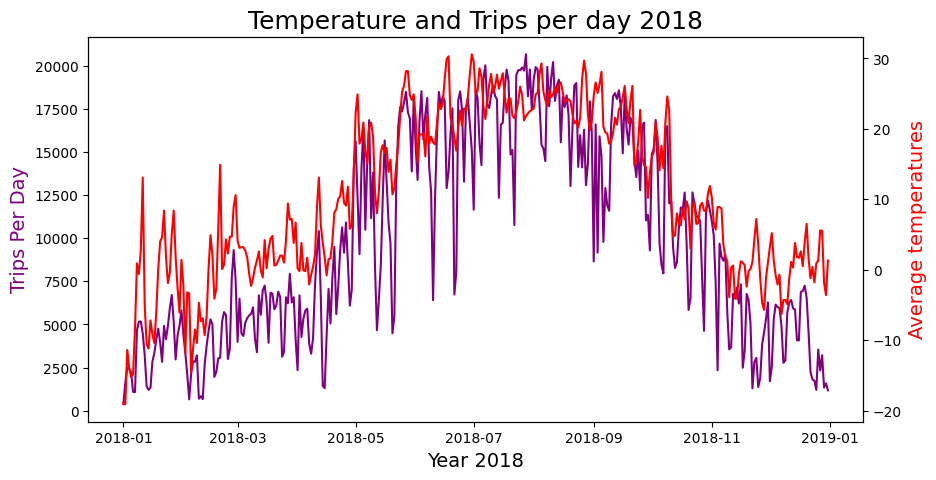

In [21]:
# create dual axis line chart

fig,ax = plt.subplots(figsize=(10, 5))

# make a plot of the trips per day
ax.plot(df_temp['trips_per_day'],color = 'purple')
ax.set_xlabel('Year 2018', fontsize = 14)
ax.set_ylabel('Trips Per Day',color = 'purple', fontsize = 14)

# create the dual axis 
ax2 = ax.twinx()

# make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp['avgTemp'], color = 'red')
ax2.set_ylabel("Average temperatures", color = 'red',fontsize=14)
plt.title('Temperature and Trips per day 2018', fontsize = 18)
plt.show()

The above code to create a dual axis line chart works in this way:

First, we define the objects - fig (figure) and ax (axes) - as subplots to the chart. By this I mean that we create an enclosing figure object with two axes inside. We also define the size of the figure in order to make it easy to see the two plots.

Then, we define the first plot using the ax object on the variable 'trips_per_day', noting that the colour for the line should be purple.

We then state that we need a second axis based on the first, which we do by using the designated twinx() function. This asks matplotlib to put both axes in the same plot.

Now we can define our second plot, which uses the ax2 object on the variable 'avgTemp', with a red colour for the line. 

Once we have added in labels and a title, our dual axis plot can be displayed.

This visual was created using an object-oriented paradigm, where specific properties are given to individual objects, integrating data and functions. We know that this is the case as the opening command begins with 'fig, ax' - figure and axes are the main objects of a matplotlib visualisation.